<div align="center"><img src="files/pwr.png"></div>
<h1>
    <div align="center">
        Soft Computing - methods and applications<br>
        <span style="font-weight:normal;"><font size="4">(Obliczenia Miękkie - metody i zastosowania)</font></span>
    </div>
</h1>
<h3>
    <b>Subject:</b>
</h3>
<p>
    <b>EN:</b> "Analysis and comparision of different image classification approaches"
</p>
<p>
    <b>PL:</b> "Analiza i porównanie różnych metod klasyfikacji obrazów"
</p>
<h3>
    <b>Author:</b>
</h3>
<p>
    Paweł Grochowski
</p>

<h2>
    <b>Problem description:</b>
</h2>
<p>
    Despite the long run, and far-reaching research in the field of automatic objects detection in images, that issue remains a non-trivial task even nowadays.<br>
    <br>
    <u>Why is that?</u><br>
    We must remember that a digital image is just a matrix (in the simplest case) of numeric values.<br>
    What is worse, the images can have different sizes and, consequently, the size of the corresponding matrixes of values will differ as well.<br>
    <br>
    Now imagine that we must find similar features between the images based only on it's values matrixes.<br>
    <br>
    Of course, nowadays there are many feature extraction algorithms, and with artificial neural networks using deep learning we don't even have to extract anything (they find features themselves based only on pixel values).<br>
    However, it is important to be aware of how complicated at the atomic level the task we are confronting is.<br>
    <br>
    Besides we must also take into account the environmental factors.<br>
    For a man it is natural that the same object viewed in the intense light and in the shadow remains the same.<br>
    Consider how much trouble it can cause to computer.<br>
    After all it means completely different values in the image matrix.<br>
    Not to mention that the same goes for object position and rotation differences between images.<br>
    <br>
    <i><b>That is also why i claim this subject still worth studing.</b></i>
<p>

<h2>
    Used packages:
</h2>

In [47]:
import os
import matplotlib
import numpy
import scipy.misc
import keras.datasets.cifar10
import keras.utils.np_utils
import keras.constraints
import keras.optimizers
import keras.models
import keras.layers
import keras.layers.convolutional
import cv2
import numpy
import sklearn
import sklearn.utils
import sklearn.linear_model
import skimage.feature
import warnings

# Plus basic display configuration:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14.0, 4.0)

# Get current working directory:
cwd = os.getcwd()

# Get data directory path:
dataPath = os.path.abspath(os.path.join(cwd, "data"))

# Set fixed random seed for reproducibility of results:
numpy.random.seed(3)

<h2>
    <b>Used data:</b>
</h2>
<p>
    <b>Dataset source:</b><br>
    <a href="https://www.cs.toronto.edu/~kriz/cifar.html">
    https://www.cs.toronto.edu/~kriz/cifar.html</a><br>
</p>
<p>
    <b>Dataset description:</b><br>
    It is a standard dataset for studies of computer vision and machine learning, developed by Canadian Institute for Advanced Research (CIFAR).<br>
    The dataset consists of 60000 (32x32) colour images in 10 classes, with 6000 images per class.<br>
    There are 50000 training images and 10000 test images.
</p>

In [7]:
# Load data:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

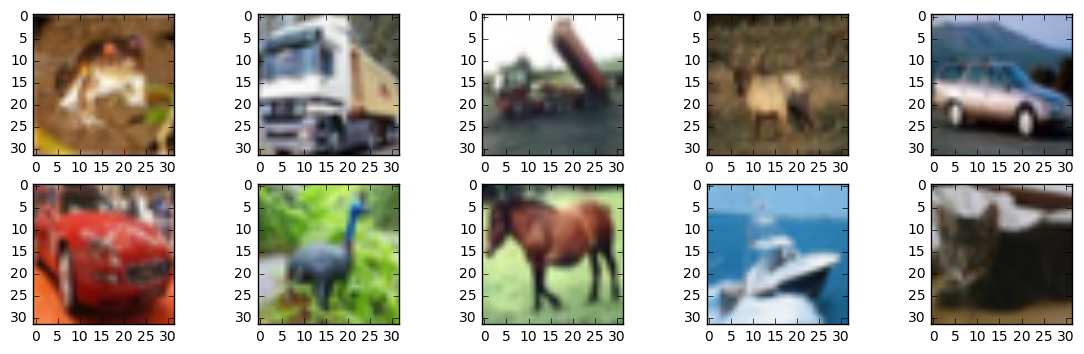

In [2]:
# Preview data:
for i in range(10):
    matplotlib.pyplot.subplot(2, 5, 1+i)
    matplotlib.pyplot.imshow(scipy.misc.toimage(X_train[i]))
matplotlib.pyplot.show()

<p>
    Images above are a preview of CIFAR-10 dataset.<br>
    Purpose of this preview is to put a face on our target.
</p>

In [8]:
# Normalize values:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
y_train = keras.utils.np_utils.to_categorical(y_train.astype(int))
y_test = keras.utils.np_utils.to_categorical(y_test.astype(int))

<h2>
    <b>Deep convolutional neural network:</b>
</h2>
<p>
    We will start our experiments with deep convolutional neural network.<br>
    <br>
    <b>Choice reason?</b><br>
    Theory and studies show that this approach should be the best for the job.<br>
    Lets try to verify it.
</p>

In [9]:
# Compilation of model function:
def compileModel(model, epochs):
    metrics = ['accuracy'] #, 'precision', 'recall', 'fmeasure'] # Evaluation metrics.
    lrate = 0.01
    decay = lrate/epochs
    sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=metrics)

In [11]:
# Memory model storing function:
def saveModel(mdl, name):
    with open(os.path.join(dataPath, "%s.json" % name), "w") as f:
        f.write(mdl.to_json())
    mdl.save_weights(os.path.join(dataPath, "%s.h5" % name))

# Memory model reading function:
def loadModel(name):
    with open(os.path.join(dataPath, "%s.json" % name), "r") as f:
        mdl = keras.models.model_from_json(f.read())
    mdl.load_weights(os.path.join(dataPath, "%s.h5" % name))
    return mdl

In [ ]:
# Common settings:
epochs = 25
bMode = "same"
activation = "relu"
wConstr = (keras.constraints.maxnorm, 3)
nb_filter = 32 # Number of convolution filters to use.
nb_row = 3 # Number of rows in the convolution kernel.
nb_col = 3 # Number of columns in the convolution kernel.

<p>
    <b>Simple network:</b><br>
    Lets start this experiment with with preety simple network.
</p>

In [ ]:
# Create model:
model = Sequential()
model.add(Convolution2D(
    nb_filter, nb_row, nb_col, input_shape=(3, 32, 32), border_mode=bMode, activation=activation, W_constraint=wConstr[0](wConstr[1])
))
model.add(Dropout(0.2))
model.add(Convolution2D(
    nb_filter, nb_row, nb_col, activation=activation, border_mode=bMode, W_constraint=wConstr[0](wConstr[1])
))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation=activation, W_constraint=wConstr[0](wConstr[1])))
model.add(Dropout(0.5))
model.add(Dense(y_test.shape[1], activation='softmax'))

# Compile model:
compileModel(model, epochs)
model.summary()

In [ ]:
# Fit model:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32)

# Save model:
saveModel(model, "model1")

In [ ]:
# Load model:
model = loadModel("model1")

# Compile model:
compileModel(model, epochs)

# Evaluate model:
scores = model.evaluate(X_test, y_test, verbose=0)
print(["%s: %.2f%%" % (model.metrics_names[idx], scores[idx]*100) for idx in range(len(model.metrics_names))])

<p>
    <b>More complicated network model:</b><br>
    This time why don't we create more complex neural network.
</p>

In [10]:
# Create model:
model = keras.models.Sequential()
model.add(keras.layers.convolutional.Convolution2D(
    nb_filter, nb_row, nb_col, border_mode=bMode, activation=activation, W_constraint=wConstr[0](wConstr[1]),
    input_shape=(3, 32, 32)
))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.convolutional.Convolution2D(
    nb_filter, nb_row, nb_col, border_mode=bMode, activation=activation, W_constraint=wConstr[0](wConstr[1])
))
model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation=activation, W_constraint=wConstr[0](wConstr[1])))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(y_test.shape[1], activation='softmax'))

# Compile model:
compileModel(model, epochs)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 3, 32, 32)     9248        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 3, 32, 32)     0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 3, 32, 32)     9248        dropout_1[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 1, 16, 32)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [29]:
# Fit model:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32)

# Save model:
saveModel(model, "model2")

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 783s - loss: 2.3034 - acc: 0.0960 - precision: 0.0000e+00 - recall: 0.0000e+00 - fmeasure: 0.0000e+00 - val_loss: 2.3029 - val_acc: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_fmeasure: 0.0000e+00
Epoch 2/25
50000/50000 [==============================] - 804s - loss: 2.3031 - acc: 0.0996 - precision: 0.0000e+00 - recall: 0.0000e+00 - fmeasure: 0.0000e+00 - val_loss: 2.3028 - val_acc: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_fmeasure: 0.0000e+00
Epoch 3/25
50000/50000 [==============================] - 849s - loss: 2.3029 - acc: 0.1002 - precision: 0.0000e+00 - recall: 0.0000e+00 - fmeasure: 0.0000e+00 - val_loss: 2.3027 - val_acc: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_fmeasure: 0.0000e+00
Epoch 4/25
50000/50000 [==============================] - 979s - loss: 2.3029 - acc: 0.0989 - precision: 0.0000e+00 - r

In [34]:
# Load model:
model = loadModel("model2")

# Compile model:
compileModel(model, epochs)

# Evaluate model:
scores = model.evaluate(X_test, y_test, verbose=0)
print(["%s: %.2f%%" % (model.metrics_names[idx], scores[idx]*100) for idx in range(len(model.metrics_names))])

['loss: 230.26%', 'acc: 10.00%', 'precision: 0.00%', 'recall: 0.00%', 'fmeasure: 0.00%']


<p>
    <b>Conclusion:</b><br>
    Accuracy result presented above proves the claims that deep convolutional neural network are a great tool for image classification.<br>
    However lets think for a while. What makes them so special?<br>
    To answare this question we must think about how every classifier works.<br>
    It creates model for every class based on training samples.<br>
    Seams this time there is no difference, but there is, a slight one.<br>
    Most classifiers create global models.<br>
    Convolutional neural network has an ability to create models based on local parts of data.<br>
    Makes it priceless for image classification issue.
</p>

<h2>
    <b>SVM with image features:</b>
</h2>
<p>
    For our second experiment we will try to make use of Support Vector Machine (abbreviated as SVM).<br>
    We will create trainibng data vectors from features extracted with Harris Corner Detector.<br>
    And to contrast our results we will try second approach of feature extraction.<br>
    Second image feature extraction algoritm will be Histogram of Oriented Gradients.
</p>

In [43]:
def extract_features_harris(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = numpy.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    return cv2.dilate(dst, None).flatten()
def extract_features_hog(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return skimage.feature.hog(gray)

In [41]:
# Read again beacuse data normalization used before is now not used:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

<p>
    <b>Harris Corners Detector algorithm:</b><br>
    At first lets try classification by features extracted with Harris Coreners Detector algoritm.
</p>

In [38]:
X_train_features = [extract_features_harris(img) for img in X_train]
X_test_features = [extract_features_harris(img) for img in X_test]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    svc = sklearn.linear_model.SGDClassifier(loss='squared_hinge', verbose=0, n_jobs=8, n_iter=1000)
    svc.fit(X_train_features, y_train)
    predicted = svc.predict(X_test_features)

    print "['acc: %s%%']" % (str(float(sklearn.metrics.accuracy_score(y_test, predicted))*100))

['acc: 15.54%']


<p>
    <b>Histogram of Oriented Gradients:</b><br>
    During our second trial we are using Histogram of Oriented Gradients algoritm.
</p>

In [48]:
X_train_features = [extract_features_hog(img) for img in X_train]
X_test_features = [extract_features_hog(img) for img in X_test]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    svc = sklearn.linear_model.SGDClassifier(loss='squared_hinge', verbose=0, n_jobs=8, n_iter=1000)
    svc.fit(X_train_features, y_train)
    predicted = svc.predict(X_test_features)

    print "['acc: %s%%']" % (str(float(sklearn.metrics.accuracy_score(y_test, predicted))*100))

['acc: 36.31%']


<p>
    <b>Conclusion:</b><br>
    As we can see from results presented above our most recent experiment has failed to impress.<br>
    The outcome is far worse than in previous experiment.<br>
    There might be many reason accountable for such a take of actions.<br>
    The most common one in situations alike is wrong preprocessing.<br>
    In this case it might unsuitable computer vision image preparation.<br>
    Only further studies might be able to add some light to it.<br>
    Neither the less based only on theory such poor results were in fact expected.
</p>